<a href="https://colab.research.google.com/github/DivyankR16/Deep_Learning/blob/main/ANN/3classClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

torch.Size([300])


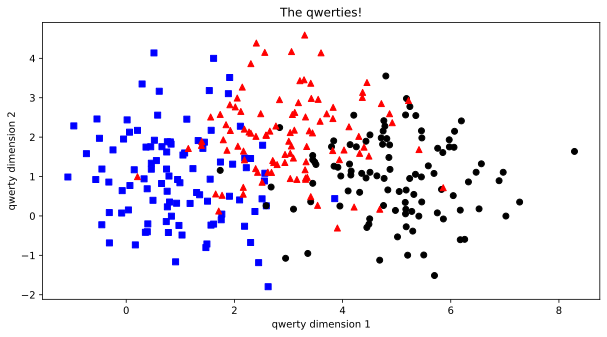

In [61]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C=[3,2]
# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]
# true labels
labels_np1 = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),2*np.ones((nPerClust,1))))
# concatanate into a matrix
data_np = np.hstack((a,b,c)).T
labels_np=labels_np1.flatten()
# # convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()
print(labels.shape)
# show the data
fig = plt.figure(figsize=(10,5))
plt.plot(data[np.where(labels==0),0],data[np.where(labels==0),1],'bs')
plt.plot(data[np.where(labels==1),0],data[np.where(labels==1),1],'ko')
plt.plot(data[np.where(labels==2),0],data[np.where(labels==2),1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [108]:
ANNclassify = nn.Sequential(
    nn.Linear(2,4),   # input layer
    nn.ReLU(),       # activation unit
    nn.Linear(4,3),   # output unit     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
)

In [109]:
ANNclassify.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6528,  0.0165],
                      [ 0.5337,  0.0590],
                      [-0.0956,  0.5606],
                      [ 0.5525,  0.2385]])),
             ('0.bias', tensor([ 0.3872, -0.4499, -0.6226, -0.2107])),
             ('2.weight',
              tensor([[-0.3379,  0.3439,  0.4654, -0.4726],
                      [ 0.2024,  0.1645, -0.3096,  0.4057],
                      [ 0.3140, -0.4027,  0.4889, -0.2163]])),
             ('2.bias', tensor([ 0.0108,  0.2835, -0.0052]))])

In [110]:

learningRate = .01

# loss function
lossfun = nn.CrossEntropyLoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [111]:
numepochs = 1000
losses = torch.zeros(numepochs)
ongoingAcc=[]
for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels.long())
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )
predictions = ANNclassify(data)
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Final accuracy: 78.3333%


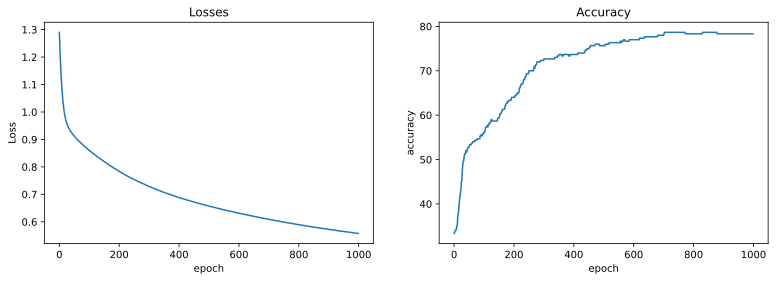

In [112]:

# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

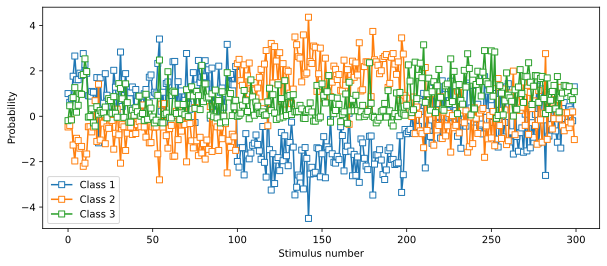

In [114]:
fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Class 1','Class 2','Class 3'])
plt.show()

# try it again without the softmax!